In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.linear_model import LinearRegression
from sklearn import svm
from sklearn.ensemble import RandomForestRegressor
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,explained_variance_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
import pandas as pd
import seaborn as sns

In [23]:
train_dataset = pd.read_csv('data/train.csv', index_col=0)

In [24]:
train_dataset.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
id,,,,,,,,,,
0,1.12,Premium,H,SI1,61.6,59.0,6.67,6.63,4.10,5363
1,1.14,Very Good,E,SI2,60.0,54.0,6.74,6.97,4.11,5593
2,0.90,Very Good,D,SI2,60.3,63.0,6.12,6.22,3.72,3534
3,0.71,Ideal,E,VS1,61.9,54.0,5.74,5.76,3.56,3212
4,0.34,Very Good,F,SI2,60.0,62.0,4.51,4.55,2.72,447


In [25]:
print(train_dataset.cut.unique())
print(train_dataset.color.unique())
print(train_dataset.clarity.unique())

['Premium' 'Very Good' 'Ideal' 'Good' 'Fair']
['H' 'E' 'D' 'F' 'I' 'G' 'J']
['SI1' 'SI2' 'VS1' 'VS2' 'VVS1' 'VVS2' 'IF' 'I1']


In [26]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
def num_transform(datasets,columns):
    for ds in datasets:
        for column in columns:
            ds[f"{column}_num"] = le.fit_transform(ds[column])

In [27]:
datasets = [train_dataset]
columns = ["cut","color","clarity"]

num_transform(datasets,columns)

In [28]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40455 entries, 0 to 40454
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   carat        40455 non-null  float64
 1   cut          40455 non-null  object 
 2   color        40455 non-null  object 
 3   clarity      40455 non-null  object 
 4   depth        40455 non-null  float64
 5   table        40455 non-null  float64
 6   x            40455 non-null  float64
 7   y            40455 non-null  float64
 8   z            40455 non-null  float64
 9   price        40455 non-null  int64  
 10  cut_num      40455 non-null  int64  
 11  color_num    40455 non-null  int64  
 12  clarity_num  40455 non-null  int64  
dtypes: float64(6), int64(4), object(3)
memory usage: 4.3+ MB


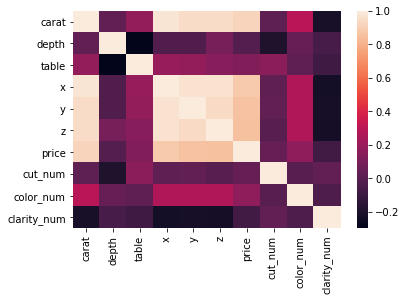

In [29]:
sns.heatmap(train_dataset.corr())

In [30]:
#delete non-number columns
clean_train_dataset = train_dataset.drop(columns=["cut","color","clarity"])
display(clean_train_dataset.head(1))

,carat,depth,table,x,y,z,price,cut_num,color_num,clarity_num
id,,,,,,,,,,
0,1.12,61.6,59.0,6.67,6.63,4.1,5363,3,4,2


In [31]:
#Train  
columnas_train = [a for a in clean_train_dataset.columns if a not in ["price"]]
X = clean_train_dataset[columnas_train]
y = clean_train_dataset["price"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

In [32]:
models = {
    "linear": LinearRegression(), 
    "svm": svm.SVR(),
    "rfr": RandomForestRegressor(n_estimators=250),
    "gbr": GradientBoostingRegressor(n_estimators=250,max_depth=10,learning_rate=0.2,loss='lad'),
    "hgbr": HistGradientBoostingRegressor(),
    "Nearestn":KNeighborsRegressor(),
    "DecisionTree":DecisionTreeRegressor()
    
}
# Train all the models in the models dict
for name,m  in models.items():
    print(f"Training {name}...")
    m.fit(X_train, y_train)


Training linear...
Training svm...
Training rfr...
Training gbr...
Training hgbr...
Training Nearestn...
Training DecisionTree...


In [33]:
printMetric = lambda label,value:print(f"\t {label}: {round(value,3)}")
for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"Evaluating model {name}")
    printMetric("R2_score",r2_score(y_test, y_pred))
    printMetric("root mean squared error",mean_squared_error(y_test, y_pred)**0.5)
    printMetric("Mean absolute error",mean_absolute_error(y_test, y_pred))
    printMetric("explained variance score",explained_variance_score(y_test, y_pred))
print("Train complete")

Evaluating model linear
	 R2_score: 0.881
	 root mean squared error: 1379.283
	 Mean absolute error: 874.085
	 explained variance score: 0.881
Evaluating model svm
	 R2_score: -0.121
	 root mean squared error: 4226.141
	 Mean absolute error: 2761.849
	 explained variance score: 0.017
Evaluating model rfr
	 R2_score: 0.981
	 root mean squared error: 552.991
	 Mean absolute error: 271.541
	 explained variance score: 0.981
Evaluating model gbr
	 R2_score: 0.979
	 root mean squared error: 576.093
	 Mean absolute error: 277.233
	 explained variance score: 0.979
Evaluating model hgbr
	 R2_score: 0.98
	 root mean squared error: 559.655
	 Mean absolute error: 290.689
	 explained variance score: 0.98
Evaluating model Nearestn
	 R2_score: 0.945
	 root mean squared error: 940.112
	 Mean absolute error: 503.874
	 explained variance score: 0.945
Evaluating model DecisionTree
	 R2_score: 0.966
	 root mean squared error: 736.873
	 Mean absolute error: 359.745
	 explained variance score: 0.966
Train c

In [34]:
RandomForestRegressor(n_estimators=250).fit(X, y)
y_pred_rfr = RandomForestRegressor(n_estimators=250).predict(X_test)

predicted = list(y_pred)
real = y_test
d = {'Prediction':predicted,'Real':real}

NotFittedError: This RandomForestRegressor instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
result = pd.DataFrame(d)
result["Diff_abs"] = result["Prediction"] -result["Real"] 
result["Diff_rel"] = result["Diff_abs"] / result["Real"] 

In [ ]:
result

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
datatrain2d = pca.fit_transform(X)

In [ ]:
datatrain2d = pd.DataFrame(datatrain2d)
sns.scatterplot(data=datatrain2d, x=0, y=1)
